# Metal skupine v prostoru in času
## Projektna naloga pri predmetu Programiranje 1
## Vir podatkov: 
[Encyclopaedia Metallum](http://www.metal-archives.com/), najbolj obsežen poskus arhiviranja podatkov o skupinah z vsaj enim izdanim albumom
## Zajeti podatki: 
* imena skupin;
* leto ter država njihovega nastanka;
* podzvrst metala, ki jo izvajajo;
* njihov status (*Active/On hold/Split-up/Unknown/Changed name/Disputed*)

Opomba: zaradi prevelike količine strani sem se omejila na 125 278 možnih ID-jev (vsaka skupina ima svoj ID, a niso vsi v uporabi). Podatke sem tako zbrala za skoraj 60 000 skupin, od teh je 16 dodanih "na roke".

## Predvidena analiza:
* kdaj število novih skupin na leto doseže maksimum;
* v kateri državi je največ aktivnih skupin;
* kateri žanri so najbolj zastopani ter kdaj so bili najbolj popularni;
* katera podzvrst je pritegnila največ propadlih skupin.

In [22]:
# priprava datoteke in uvoz podatkov za obdelavo
%matplotlib inline
import pandas as pd
pd.options.display.max_rows=25
#pd.options.display.float_format = '{:,.0f}'.format

skupine = pd.read_csv('csv/metal_skupine_id.csv')
statusi = pd.read_csv('csv/statusi.csv')
pos_zvrsti_id = pd.read_csv('csv/zvrsti.csv')
pos_leta = pd.read_csv('csv/leta.csv')
#pos_zvrsti.sum()[pos_zvrsti.sum()>250].plot(kind='bar', figsize=(20, 10))
#pos_zvrsti.sum().sort_values()

## Katerega leta je nastalo največ novih skupin?

Tu predstavljeni podatki glede novonastalih skupin na leto žal niso najbolj natančni, saj je izpuščenih podatkov preveč.
Realno je največ skupin nastalo **leta 2005**, in sicer kar *5726*. Kakorkoli, če spregledamo leta od 2006 dalje, so podatki precej uporabni.

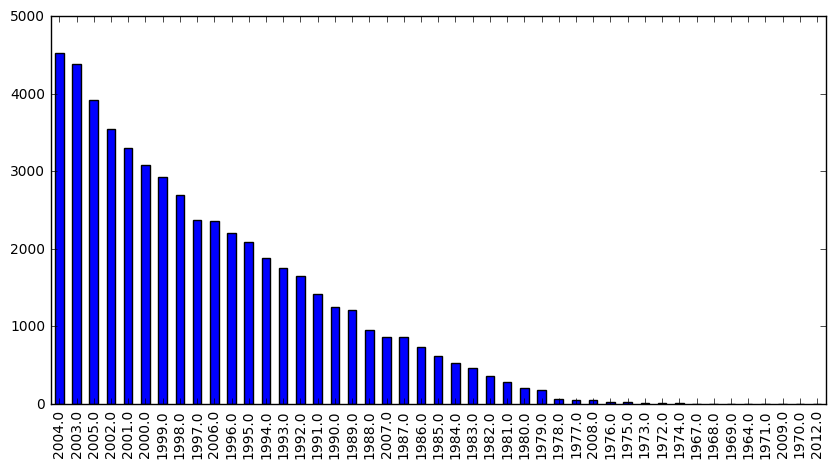

In [23]:
skupine_leto = skupine['leto'].value_counts()
#vec_kot_100 = skupine_leto > 100
#skupine[vec_kot_100]
skupine_leto.plot(kind='bar', figsize=(10, 5), sort_columns=True)

Kako pa se je popularnost zvrsti spreminjala do leta 2006? Za pridobitev tega podatka je najprej treba združiti tabeli z letnicami in zvrstmi. Skupine, ki so nastale po letu 2006 (2007?), bom izpustila.

In [ ]:
leto_zvrst = pos_leta.merge(pos_zvrsti_id)
cisto_leto_zvrst = leto_zvrst[leto_zvrst['leto'] < 2007]
cisto_leto_zvrst
vsote_leta = cisto_leto_zvrst.groupby('leto').aggregate(sum)
#pobrišem stolpec 'id':
vsote_po_letih = vsote_leta[vsote_leta.columns.difference(['id'])]
vsote_po_letih[:20]

Katere izmed mnogih zvrsti so sploh bistvene? Recimo, da je zvrst zanemarljiva, če je le-tej pripadajočih skupin manj kot tisoč.

In [25]:
vsote_zvrsti = pos_zvrsti_id.sum()
glavne_zvrsti = vsote_zvrsti[vsote_zvrsti >= 1000]
glavne_zvrsti.sort_values()
zvrsti = glavne_zvrsti.to_frame()
nazivi_zvrsti = zvrsti[zvrsti.columns.difference([0])].transpose()
nazivi_zvrsti = nazivi_zvrsti[nazivi_zvrsti.columns.difference(['id'])]
nazivi_zvrsti

,Black,Brutal,Death,Doom,Gothic,Grindcore,Groove,Hard Rock,Heavy,Melodic,Metalcore,Power,Progressive,Rock,Speed,Symphonic,Thrash


Zdaj združimo omejeno časovno obdobje z omejenim spektrom zvrsti.

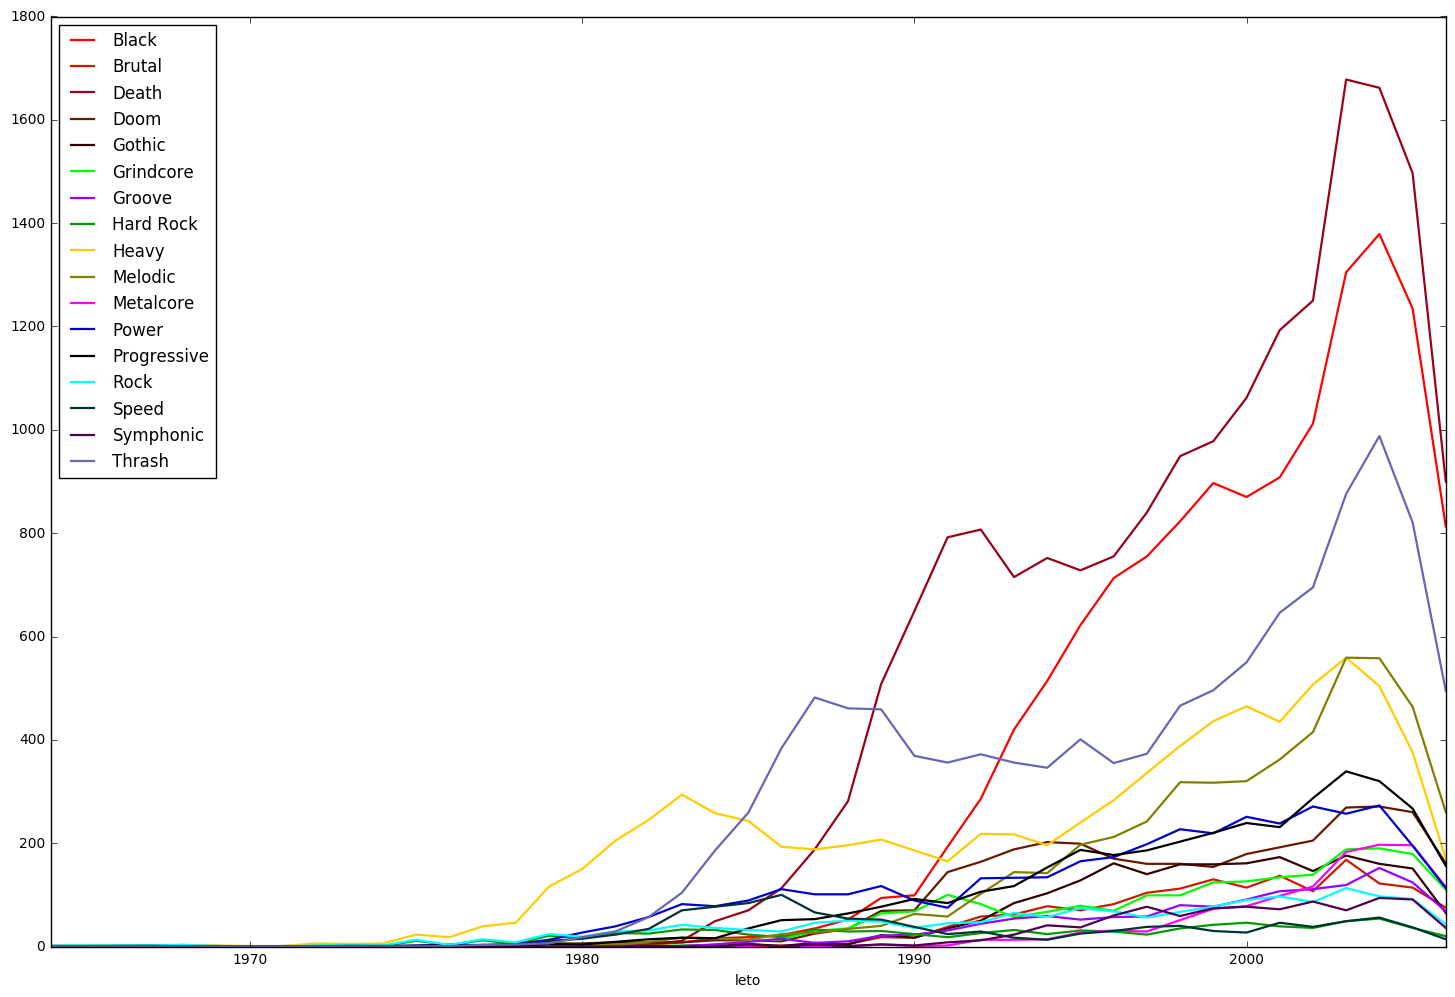

In [26]:
stolpci = [naziv for naziv in nazivi_zvrsti]
omejene_vsote = vsote_po_letih[stolpci]
barve = 5*[(1.0, 0.0, 0.0), (0.8, 0.1, 0.0), (0.6, 0.0, 0.1),  (0.4, 0.1, 0.0), (0.2, 0.0, 0.0),
         (0.0, 1.0, 0.0), (0.6, 0.0, 1.0), (0.0, 0.6, 0.0), (1.0, 0.8, 0.0), (0.5, 0.5, 0.0),
         (1.0, 0.0, 1.0), (0.0, 0.0, 0.8), (0.0, 0.0, 0.0), (0.0, 1.0, 1.0), (0.0, 0.2, 0.2),
           (0.3, 0.0, 0.3), (0.4, 0.4, 0.7)]
for stolpec, barva in zip(omejene_vsote, barve):
    omejene_vsote[stolpec].plot(kind='line', legend=True, figsize=(18, 12), linewidth=1.6, color=barva)

Iz grafa je razvidno, da je najbolj zastopan žanr **death metal**, sledita mu pa **black** in **thrash metal**. **Heavy metal** je bil najbolj popularna zvrst pred letom 1850, nasledil ga je thrash metal, zatem pa je zavladal death metal. Po pričakovanjih black metal tudi med metalci nikoli ni bil *'mainstream'*.

**Opomba:** ker sem zvrsti delila z uporabo regularnih izrazov, je v zvrst *death metal* vključena tudi podzvrst *melodic death metal*, kar je morda vzrok za tako očitno prevlado te zvrsti.
Po dodatni raziskavi sem ugotovila, da je delež omenjene zvrsti med letoma 1990 in 2007 zanemarljiv, med letoma 2003 in 2006 pa predstavlja melodični death metal kar četrtino vseh death metal skupin. Graf bi z upoštevanjem tega lahko padel pod linijo black metala. 

Oglejmo si posebej grafe teh štirih najbolj razširjenih stilov.

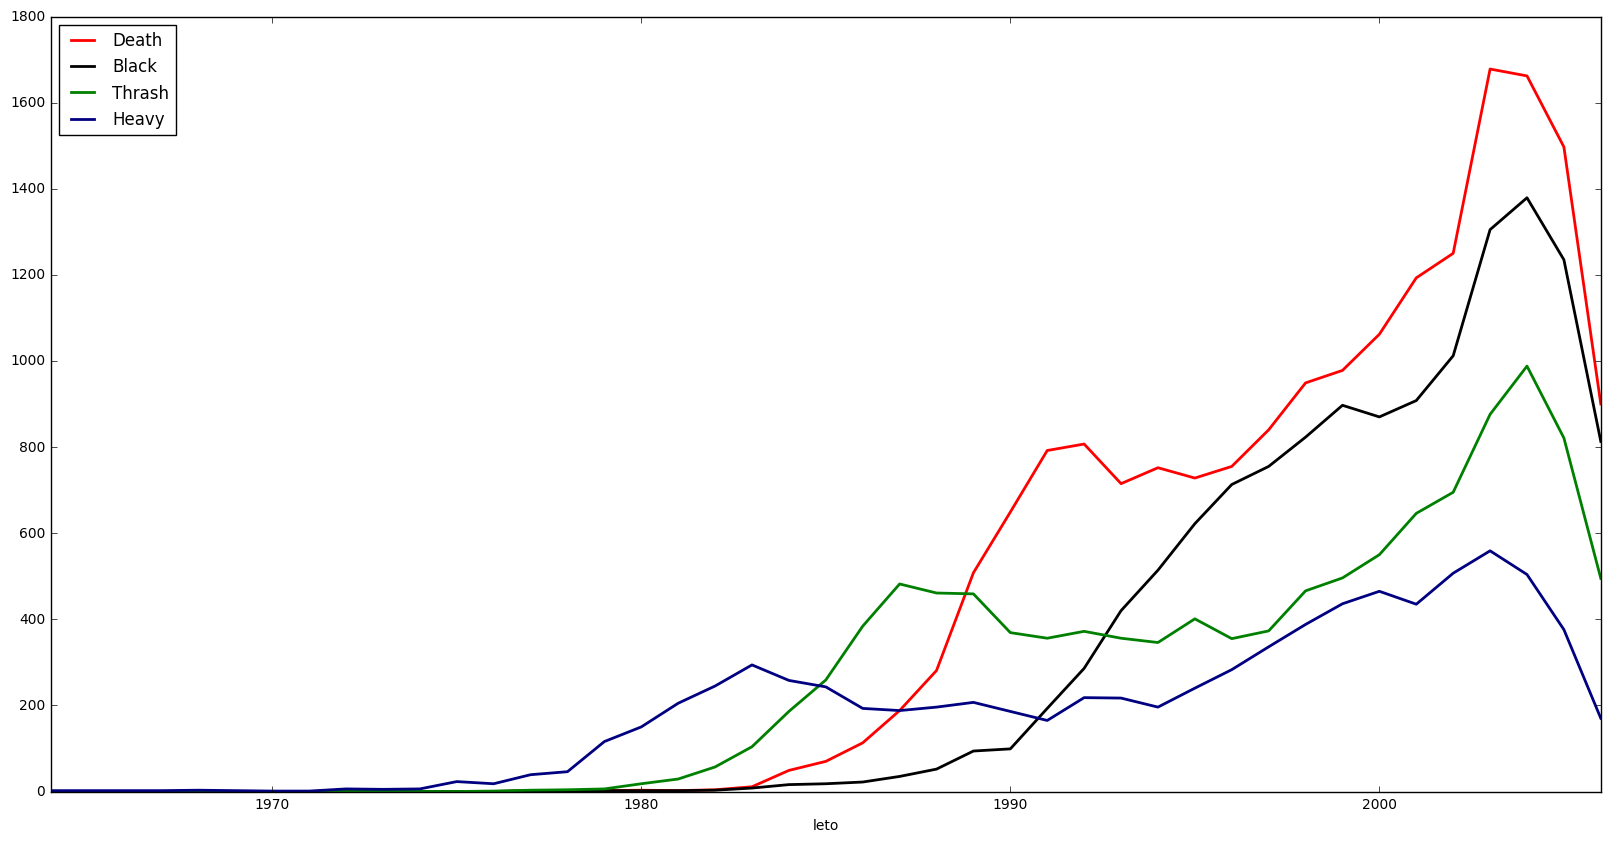

In [43]:
stiri_zvrsti_barve = [('Death', 'red'), ('Black', 'black'), ('Thrash', 'green'), ('Heavy', 'navy')]
for zvrst, barva in stiri_zvrsti_barve:
    omejene_vsote[zvrst].plot(kind='line', legend=True, figsize=(20, 10), linewidth=2.0, color=barva)

## Katera država ima največ aktivnih metal skupin?

In [ ]:
aktivni = skupine[skupine['status'] == 1]
aktivni.plot(kind='bar')

In [ ]:
aktivni = skupine[skupine['status'] == 1]
cakajoci = skupine[skupine['status'] == 2]
propadli = skupine[(skupine['status'] == 3) | (skupine['status'] == 6)]
neznano = skupine[skupine['status'] == 4]
preimenovani = skupine[skupine['status'] == 5]
skregani = skupine[skupine['status'] == 6]
propadli.groupby('zvrst').aggregate(sum)

In [ ]:
po_statusu = skupine.groupby('status').sum()
po_statusu.plot(subplots=True, kind='pie')
statusi
#propadajoca_zvrst = po_statusu.sum().sort_values('po_statusu', ascending=False)